In [1]:
#On importe les librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Pour éviter d'avoir les messages warning
import warnings
warnings.filterwarnings('ignore')

# Partie MISSION 1 (Marc)

## Mission 1.1 : la proportion de personnes en état de sous-nutrition

In [4]:
#Lecture dU fichier csv
df= pd.read_csv('sous_nutrition.csv')
df.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [5]:
#On ne garde que les lignes pour l'année 2017
df= df[df['Année'] == '2016-2018']

#va supprimer les lignes dont les valeurs sont "<0.1" (20 valeurs)
df.drop(df[df['Valeur'].isin(["<0.1"])].index, inplace=True)

#On ajoute les pays dont les valeurs pouvaient être non significatives
low = pd.DataFrame([['Tous les pays à <0.1' , '2016-2018','2']],  columns=['Zone', 'Année', 'Valeur'])
df = pd.concat([df, low])

#On remplace les données manquantes par 0
df =  df.fillna(0)

#On convertit la colonne valeur contenant des 'object' en float
df['Valeur'] = df['Valeur'].astype(float, errors = 'raise')

#somme des personnes en sous nutrition ramené à l'unité
sums=df["Valeur"].sum()*1000000 
sums = int(sums)

print("Nombre total de personnes en sous alimentation en 2017: " + str(sums))

Nombre total de personnes en sous alimentation en 2017: 537699999


In [6]:
#Lecture dU fichier csv
pop = pd.read_csv('population.csv')
pop.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [7]:
#On ne récupère que les données pour l'année  2017
pop= pop[pop['Année'] == 2017]

#On additionne les valeurs des pays pour avoir la population totale 
population = (pop['Valeur']).sum()*1000

population = int(population)

print("En 2017, la population mondiale était de " + str(population) + " personnes")

En 2017, la population mondiale était de 7548134111 personnes


In [8]:
#Calcul de la proportion des personnes en sous nutrition
prop_sousnutrition = sums/population *100

prop_sousnutrition = round((prop_sousnutrition),2)

print("Environ " + str(prop_sousnutrition) +"% " + "de la population est en sous nutrition")

Environ 7.12% de la population est en sous nutrition


## Mission 1.2 : Le nombre théorique de personnes qui pourraient être nourries

In [9]:
#On ouvre le fichier dispo alimentaire
dispo_alim = pd.read_csv('dispo_alimentaire.csv') 
dispo_alim.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [10]:
#On ajoute dans le dataframe de dispo_alim le nombre d'habitants par pays en 2017
dispo_alim = dispo_alim.merge(pop)

#On multiplie les valeurs par 1000 pour les avoir à l'unité
alimtotal = dispo_alim

alimtotal["Valeur"] = alimtotal["Valeur"]*1000

kcal_annee = alimtotal['Disponibilité alimentaire (Kcal/personne/jour)'] * (alimtotal['Valeur']) * 365

#On effectue ensuite la somme pour obtenir le total des kcal disponible danns le monde pour une année
kcal_annee = kcal_annee.sum()

#On suppose qu'en moyenne une personne a besoin d'environ 2400 Kcal par jour
nbpersonnes = int(kcal_annee/(2400*365))

prctotal = np.round(nbpersonnes/population*100,2)

print("On peut nourrir théoriquement "+ str(nbpersonnes) +" personnes soit " + str(prctotal) + '% de la popoulation')


On peut nourrir théoriquement 8716243594 personnes soit 115.48% de la popoulation


## Mission 1.3 : Nombre théorique de personne qui pourraient être nourries avec des produits d'origine végétale

In [11]:
#Calcul du total des produits d'origine vegetales en million (kcal/jour)
dispo_alim['Disponibilité alimentaire en million (Kcal/jour)'] = np.round((dispo_alim['Disponibilité alimentaire (Kcal/personne/jour)'] * dispo_alim['Valeur'])/1000000,2)

#On effectue la somme de la disponibilité alimentaire total des produits d'origine vegetales
dispo_vege = dispo_alim[dispo_alim['Origine']=='vegetale']['Disponibilité alimentaire en million (Kcal/jour)'].sum()

#On suppose qu'une personne a besoin d'environ 2400 kcal par jour
totalvege = dispo_vege / 2400

#Conversion en milliard
totalvege = np.round(totalvege/1000,3)

#Calcul de la proportion
prop_vege = np.round((totalvege*1000000000/population*100),2)

print("On peut nourrir " + str(totalvege) + " milliard d'habitants avec des produits d'origine végétale soit " + str(prop_vege) + '% de la popoulation')

On peut nourrir 7.192 milliard d'habitants avec des produits d'origine végétale soit 95.28% de la popoulation


## Mission 1.4.1 : Utilisation de la disponibilité intérieure : part attribuée à l'alimentation des animaux

### Disponibilité intérieure = Production + Importations + Variation - Exportations = Nourriture + Aliments animaux + Semences + Pertes + Traitement + Autres utilisations

#### J1 = O1 + L1 + R1 - K1 = M1 + D1 + P1 + N1+ Q1 + E1

In [12]:
#on calcule la somme de la disponibilité interieur 
totaldispointerieure =dispo_alim['Disponibilité intérieure'].sum()
dispo_alim.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Valeur,Disponibilité alimentaire en million (Kcal/jour)
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,...,NaN,53.0,NaN,53.0,NaN,NaN,NaN,2017,36296113.0,181.48
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,...,40.0,39.0,2.0,3.0,NaN,NaN,NaN,2017,36296113.0,36.30
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,2017,36296113.0,36.30
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2017,36296113.0,0.00
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,...,82.0,82.0,NaN,NaN,NaN,NaN,NaN,2017,36296113.0,145.18


In [13]:
#On remplace les NaN par des 0 
dispo_alim['Aliments pour animaux'].fillna(0,inplace=True)
#On effectue la somme de l'alimentation pour animaux
total_animale =dispo_alim['Aliments pour animaux'].sum()

In [14]:
#On calcule ensuite la proportion d'utilisation de la nourriture pour les animaux
prop_animale= np.round((total_animale/totaldispointerieure)*100,2)
print(str(prop_animale) +"% de la disponibilité intérieure utilisée est pour l'alimentation des animaux.")

13.23% de la disponibilité intérieure utilisée est pour l'alimentation des animaux.


## Mission 1.4.2 : Utilisation de la disponibilité intérieure : calcul des pertes 

In [15]:
#On va remplacer les NaN par des 0
dispo_alim['Pertes'].fillna(0,inplace=True)
#On effectue la somme de l'alimentation pour animaux
total_pertes = dispo_alim['Pertes'].sum()
#Puis à l'aide du résultat on calcule la proportion des pertes par rapport à la disponibilité intérieure et on l'affiche
prop_pertes = np.round((total_pertes/totaldispointerieure)*100,2)
print(str(prop_pertes) + "% de la disponibilité intérieure consituent des pertes")

4.65% de la disponibilité intérieure consituent des pertes


## Mission 1.4.3 : Utilisation de la disponibilité intérieure : Alimentation humaine

In [16]:
#On effectue la somme de l'alimentation humaine
alimentation_humaine = dispo_alim['Nourriture'].sum()
#On calcule la proportion et on l'affiche
prop_alimentation_humaine = np.round((alimentation_humaine/totaldispointerieure)*100,2)
print(str(prop_alimentation_humaine) + "% de la disponibilité intérieure est pour l'alimenntation humaine")

49.37% de la disponibilité intérieure est pour l'alimenntation humaine


### Visualisation des proportions de l'utilisation de la disponiblité intérieure

In [17]:
taux = [["Alimentation humaine",round(prop_alimentation_humaine,2)], ["Alimentation animale",round(prop_animale,2)], ["Pertes",round(prop_pertes,2)]]
df_taux = pd.DataFrame(taux, columns=['Type', 'Proportion'],dtype=float)
df_taux

,Type,Proportion
0,Alimentation humaine,49.37
1,Alimentation animale,13.23
2,Pertes,4.65


([<matplotlib.axis.XTick at 0x114805059a0>,
 [Text(0, 0, 'Alimentation humaine'),
  Text(1, 0, 'Alimentation animale'),
  Text(2, 0, 'Pertes')])

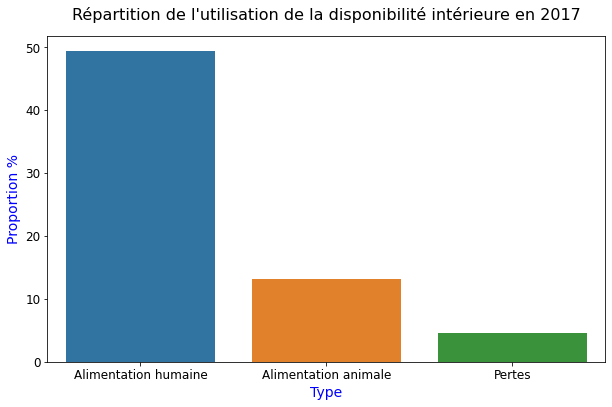

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Type', y = 'Proportion', data = df_taux )
plt.xlabel("Type",fontsize = 14, color = 'blue')
plt.ylabel('Proportion %', fontsize = 14, color = 'blue')
plt.title("Répartition de l'utilisation de la disponibilité intérieure en 2017", fontsize = 16, color = 'black',y =1.03)
plt.tick_params(axis = "both", labelsize=12)
nouveaux_xticks = ["Alimentation humaine", "Alimentation animale", "Pertes"]
locs, labels=plt.xticks()
plt.xticks(locs, nouveaux_xticks)

# Questions de Julien : Concernant l'utilisation des céréales

In [18]:
#Dispo cereale 2017

liste_cereale2017 = ['Blé et produits','Céréales, Autres', 'Maïs et produits', 'Millet et produits','Orge et produits', 'Riz et produits', 'Avoine', 'Sorgho et produits', 'Seigle et produits']
df_cereale2017 = dispo_alim[dispo_alim["Produit"].isin(liste_cereale2017)].groupby("Zone").sum().reset_index() 
prop_list2017 = [df_cereale2017['Aliments pour animaux'].sum() / df_cereale2017["Disponibilité intérieure"].sum(),
df_cereale2017['Nourriture'].sum() / df_cereale2017["Disponibilité intérieure"].sum(),]
prop_list2017.append(1-prop_list2017[0]-prop_list2017[1])

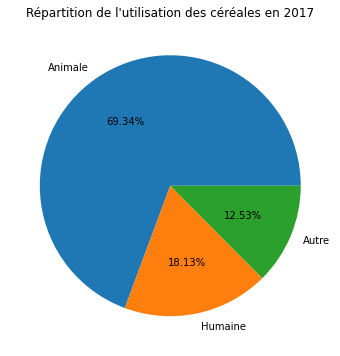

In [19]:
#On regle la taille du pie plot
plt.figure(figsize = (6, 6))
#On affiche le pie plot 
plt.pie(prop_list2017, labels = [ 'Animale','Humaine', 'Autre'],autopct = lambda x: str(round(x, 2)) + '%')
plt.title("Répartition de l'utilisation des céréales en 2017");

In [26]:
liste_cereale2013 = ['Blé','Céréales, Autres', 'Maïs', 'Millet','Orge', 'Riz (Eq Blanchi)', 'Avoine', 'Sorgho', 'Seigle']
df_cereale2013 = dispo_alim[dispo_alim["Produit"].isin(liste_cereale2013)].groupby("Zone").sum().reset_index() 
prop_list2013 = [df_cereale2013['Aliments pour animaux'].sum() / df_cereale2013["Disponibilité intérieure"].sum(),
df_cereale2013['Nourriture'].sum() / df_cereale2013["Disponibilité intérieure"].sum(),]
prop_list2013.append(1-prop_list2013[0]-prop_list2013[1])

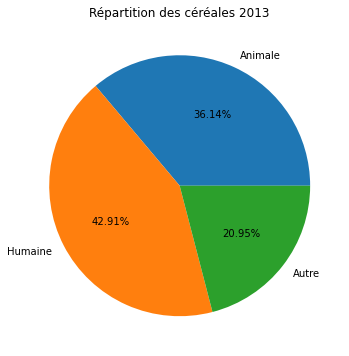

In [27]:
plt.figure(figsize = (6, 6))
plt.pie(prop_list2013, labels = [ 'Animale','Humaine', 'Autre'],autopct = lambda x: str(round(x, 2)) + '%')
plt.title('Répartition des céréales 2013');

# Questions de Julien : Concernant le manioc en Thaïlande

In [23]:
sous_nutrition_thailande = df[df["Zone"] == "Thaïlande"]
#On affiche le nombre de personnes en sous nutrition en Thaïlande (en millions)
sous_nutrition_thailande = sous_nutrition_thailande["Valeur"]
sous_nutrition_thailande


1114    6.2
Name: Valeur, dtype: float64

In [26]:
population_thailande = pop[pop["Zone"] == "Thaïlande"]
population_thailande = population_thailande["Valeur"]/1000
population_thailande


1312    69.20981
Name: Valeur, dtype: float64

In [20]:
#On ajoute un index
dispo_alim = dispo_alim.reset_index()
#On crée la variable "exportation_manioc" qui correspond à aux données de la Thailande sur le produit 'manioc'
exportation_manioc = dispo_alim.loc[(dispo_alim['Produit'] == "Manioc") & (dispo_alim['Zone'] == "Thaïlande"),:]

In [21]:
#On affiche les données concernant le manioc en Thailande
exportation_manioc

,index,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
13809,13809,Thaïlande,Manioc,vegetale,1800.0,2081.0,40.0,13.0,0.05,0.14,6264.0,25214.0,1250.0,871.0,1511.0,30228.0,NaN,0.0,0.0


In [150]:
#100g de manioc est environ de 130 kcal on ramène donc au kg
kcal_manioc = 1300
#On va chercher le nombre d'habitants en millier de la Thaïlande en 2017
hab_Thaïlande = pop[pop['Zone'] == 'Thaïlande']
#Production x 1000000 = production en kilo, xkcal manioc par kg / 2400(kcal par personne par jour) /365 (nombre de jours dans une année)
expo_manioc = int(exportation_manioc['Exportations - Quantité'].iloc[0]*1000000*kcal_manioc /2400/365)
prop_Thailande = exportation_manioc['Exportations - Quantité'].iloc[0]*1000*kcal_manioc /2400/365/hab_Thaïlande['Valeur'].iloc[0]*100
prop_Thailande = round(prop_Thailande,2)
#On affiche le nombre theorique de personnes qui pourraient etre nourries avec l'exportation de manioc en Thailande

print("Le nombre d'habitants qui pourraient etre nourries avec l'exportation de manioc en Thailande est:", expo_manioc)
print("Ce qui représente:", prop_Thailande,  "% de la population de Thailande")
      


Le nombre d'habitants qui pourraient etre nourries avec l'exportation de manioc en Thailande est: 37418036
Ce qui représente: 54.91 % de la population de Thailande


# Partie MISSION 2 (Mélanie)

## Mission 2.1 : Question 1: Les pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017

In [2]:
df_nutri= pd.read_csv("sous_nutrition.csv")
df_popu = pd.read_csv('population.csv')

In [3]:
# on remplace les valeurs de "Année" du dataframe df_nutri
df_nutri['Année'] = df_nutri['Année'].replace(['2012-2014', '2013-2015','2014-2016','2015-2017','2016-2018','2017-2019'],['2013', '2014','2015','2016','2017','2018'])
#on change le type de la colonne 'Année' de df_nutri en 'int' pour la merge
df_nutri['Année']=df_nutri['Année'].astype(int)
#On merge les df_popu et df_nutri ensemble sur les colonnes 'Zone' et Année' dans une nouveau df appelé 'df1'
df1=df_popu.merge(right=df_nutri, on=['Zone','Année'] )
#on change le nom de la colonne 'valeur_x' en 'valeur_population' et 'valeur_y' en 'valeur_sous_nutrition'
df1= df1.rename(columns = {'Valeur_x': "Nombre d'habitants",'Valeur_y': 'Sous Nutrition'})
df1.head(10)

,Zone,Année,Nombre d'habitants,Sous Nutrition
0,Afghanistan,2013,32269.589,8.6
1,Afghanistan,2014,33370.794,8.8
2,Afghanistan,2015,34413.603,8.9
3,Afghanistan,2016,35383.032,9.7
4,Afghanistan,2017,36296.113,10.5
5,Afghanistan,2018,37171.921,11.1
6,Afrique du Sud,2013,53687.121,2.2
7,Afrique du Sud,2014,54544.186,2.5
8,Afrique du Sud,2015,55386.367,2.8
9,Afrique du Sud,2016,56207.646,3


In [4]:
#On change le type objet de "valeur_sous_nutrition" en numerique
df1['Sous Nutrition'] = pd.to_numeric(df1['Sous Nutrition'],errors = 'coerce')
#On garde maintenant que les données concernant l'année 2017 dans un nouveau dataframe df2017
df2017 =df1[df1.Année==2017]

In [15]:
#on multiplie les valeur de la colonne 'valeur_sous_nutrition' et 'valeur_population' par 1000 pour ramener le tout à l'unité
df2017['Sous Nutrition'] = df2017['Sous Nutrition']*1000

In [6]:
df2017["Nombre d'habitants"] = df2017 ["Nombre d'habitants"]*1000

In [7]:
#On affiche notre dataframe df2017
df2017.head(10)

,Zone,Année,Nombre d'habitants,Sous Nutrition
4,Afghanistan,2017,36296113.0,105.0
10,Afrique du Sud,2017,57009756.0,31.0
16,Albanie,2017,2884169.0,1.0
22,Algérie,2017,41389189.0,13.0
28,Allemagne,2017,82658409.0,NaN
34,Andorre,2017,77001.0,NaN
40,Angola,2017,29816766.0,58.0
46,Antigua-et-Barbuda,2017,95426.0,NaN
52,Arabie saoudite,2017,33101179.0,16.0
58,Argentine,2017,43937140.0,15.0


In [16]:
#Création de la colonnes Proportion de sous nutrition
df2017['Proportion sous Nutrition'] = np.round((df2017['Sous Nutrition'] / df2017["Nombre d'habitants"])*100,2)

In [17]:
df2017.dropna(subset = ["Proportion sous Nutrition"], inplace=True)

In [18]:
#On affiche les 10 pays avec le taux de sous-nutriton les plus élevés en 2017
prop_sous_ali = df2017.sort_values(by = 'Proportion sous Nutrition', ascending = False).head(10)
prop_sous_ali.head(10)

,Zone,Année,Nombre d'habitants,Sous Nutrition,Proportion sous Nutrition
472,Haïti,2017,10982366.0,5300000.0,48.26
946,République populaire démocratique de Corée,2017,25429825.0,12000000.0,47.19
652,Madagascar,2017,25570512.0,10500000.0,41.06
622,Libéria,2017,4702226.0,1800000.0,38.28
604,Lesotho,2017,2091534.0,800000.0,38.25
1102,Tchad,2017,15016753.0,5700000.0,37.96
970,Rwanda,2017,11980961.0,4200000.0,35.06
730,Mozambique,2017,28649018.0,9400000.0,32.81
1120,Timor-Leste,2017,1243258.0,400000.0,32.17
4,Afghanistan,2017,36296113.0,10500000.0,28.93


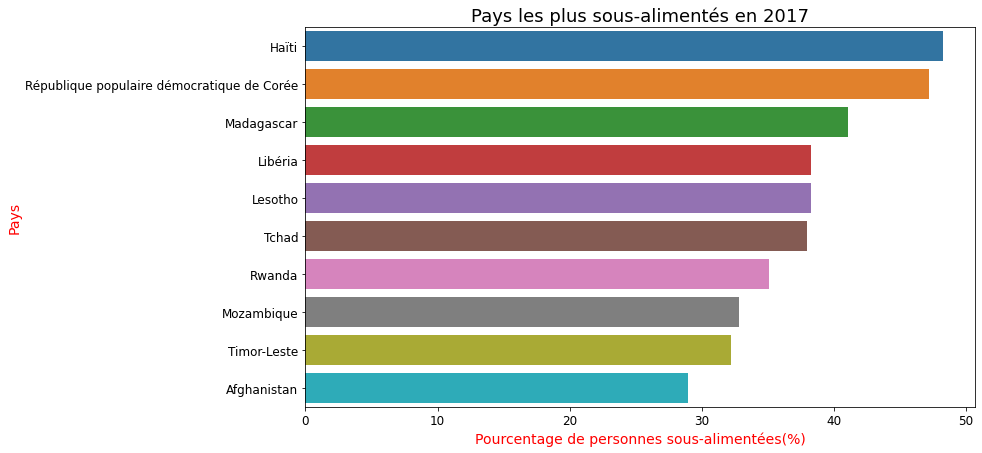

In [19]:
plt.figure(figsize=(12, 7))
sns.barplot(x='Proportion sous Nutrition', y = 'Zone', data = prop_sous_ali )
plt.xlabel("Pourcentage de personnes sous-alimentées(%)", fontsize = 14, color = 'red',y =1.03)
plt.ylabel('Pays', fontsize = 14, color = 'red')
plt.title('Pays les plus sous-alimentés en 2017', fontsize = 18, color = 'Black')
plt.tick_params(axis = "both", labelsize=12)

## Mission 2.1 : Question 2: Pays le plus bénéficié d’aide depuis 2013

In [2]:
df_aide = pd.read_csv("aide_alimentaire.csv")

In [3]:
df_aide.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [143]:
#On supprimme les colonne Produit et année
df_aide_recu= df_aide.drop(columns=['Produit', 'Année'])

#On affiche le dataframe de façon plus lisible, en groupant par Pays et Année, puis en faisant la somme des lignes groupées
df_aide_recu = df_aide.groupby(['Pays bénéficiaire']).agg({'Valeur': np.sum})

df_aide_recu.head()

,Valeur
Pays bénéficiaire,
Afghanistan,185452
Algérie,81114
Angola,5014
Bangladesh,348188
Bhoutan,2666


In [5]:
#On affiche les 10 pays qui ont le plus bénéficié d'aide depuis 2013
df_aide_recu.sort_values(by = 'Valeur', ascending = False).head(10)

,Valeur
Pays bénéficiaire,
République arabe syrienne,1858943
Éthiopie,1381294
Yémen,1206484
Soudan du Sud,695248
Soudan,669784
Kenya,552836
Bangladesh,348188
Somalie,292678
République démocratique du Congo,288502


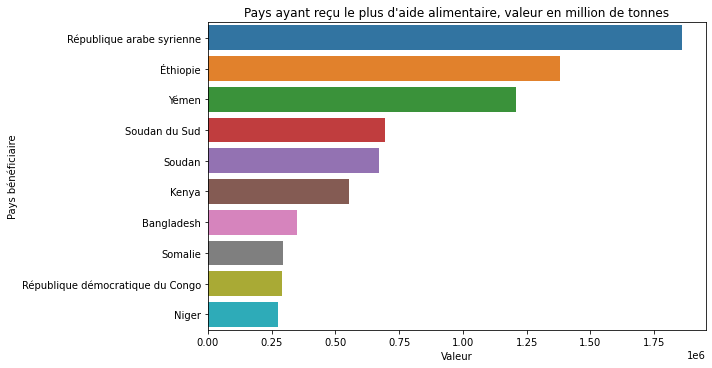

In [6]:
#On affiche un graphique avec les 10 pays qui ont reçu le plus d'aide alimentaire depuis 2013
top_10_aide = df_aide_recu.sort_values(by = 'Valeur', ascending = False)[:10]
plt.figure(figsize = (10, 5))
sns.barplot(data=top_10_aide, x="Valeur", y=top_10_aide.index)
plt.tight_layout()
plt.title("Pays ayant reçu le plus d'aide alimentaire, valeur en million de tonnes")
plt.show()

## Mission 2.1 : Question 3: Les pays ayant le plus de disponibilité/habitant

In [24]:
#On regroupe par Zone(Pays), puis en fesant la sommes des lignes groupées dans un dataframe appelé top_dispo
top_dispo = dispo_alim.groupby(['Zone']).agg({
'Aliments pour animaux': np.sum,'Autres Utilisations': np.sum,'Disponibilité alimentaire (Kcal/personne/jour)': np.sum,
'Disponibilité alimentaire en quantité (kg/personne/an)': np.sum,'Disponibilité de matière grasse en quantité (g/personne/jour)': np.sum,
'Disponibilité de protéines en quantité (g/personne/jour)': np.sum,'Disponibilité intérieure': np.sum,
'Exportations - Quantité': np.sum,'Importations - Quantité': np.sum,'Nourriture': np.sum,'Pertes': np.sum,'Production': np.sum,'Semences': np.sum,
'Traitement': np.sum,'Variation de stock': np.sum})
#On rajoute un index a top_dispo
top_dispo = top_dispo.reset_index()

In [25]:
top_dispo.head(10)

,Zone,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,768.0,415.0,2087.0,351.41,33.50,58.26,13515.0,278.0,2988.0,10735.0,1135.0,11171.0,395.0,63.0,-368.0
1,Afrique du Sud,5309.0,876.0,3020.0,564.80,83.58,85.33,61256.0,11674.0,7517.0,29812.0,2193.0,63263.0,253.0,22819.0,2153.0
2,Albanie,660.0,174.0,3188.0,1095.54,106.48,111.37,4758.0,94.0,933.0,3476.0,276.0,3964.0,55.0,113.0,-45.0
3,Algérie,4352.0,1707.0,3293.0,809.13,76.48,91.92,42630.0,655.0,17403.0,31729.0,3753.0,26359.0,449.0,637.0,-479.0
4,Allemagne,30209.0,7711.0,3503.0,957.52,141.62,101.39,162275.0,57431.0,65353.0,79238.0,3781.0,154547.0,1551.0,39842.0,-192.0
5,Angola,9259.0,451.0,2474.0,701.46,53.54,57.27,32029.0,23.0,4416.0,15059.0,4799.0,28857.0,337.0,2121.0,-1228.0
6,Antigua-et-Barbuda,0.0,20.0,2416.0,694.17,89.76,83.49,79.0,0.0,63.0,58.0,0.0,20.0,0.0,0.0,-7.0
7,Arabie saoudite,11841.0,159.0,3255.0,622.78,107.83,91.59,31274.0,4707.0,27726.0,17956.0,1040.0,8878.0,97.0,601.0,-628.0
8,Argentine,7890.0,4194.0,3226.0,784.96,116.46,102.60,114369.0,52333.0,1212.0,32531.0,3522.0,176124.0,2416.0,63983.0,-10632.0
9,Arménie,657.0,242.0,2924.0,985.68,96.63,90.06,4388.0,149.0,818.0,2929.0,228.0,3819.0,168.0,166.0,-95.0


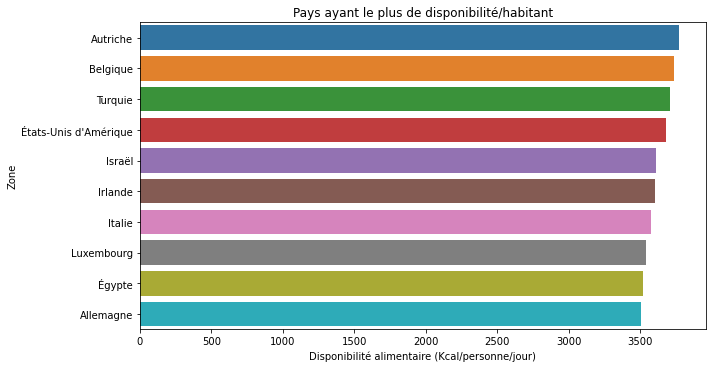

In [26]:
#On affiche les 10 pays qui ont le plus de disponibilité alimentaire/habitant sur un graphique
top_10_dispo = top_dispo.sort_values(by = 'Disponibilité alimentaire (Kcal/personne/jour)', ascending = False)[:10]
plt.figure(figsize = (10, 5))
sns.barplot(data=top_10_dispo, x="Disponibilité alimentaire (Kcal/personne/jour)", y=top_10_dispo.Zone)
plt.tight_layout()
plt.title("Pays ayant le plus de disponibilité/habitant")
plt.show()

In [27]:
top_10_dispo.head()

,Zone,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
11,Autriche,3412.0,1001.0,3770.0,1069.20,170.44,106.20,19308.0,6733.0,8463.0,9085.0,459.0,18129.0,173.0,5178.0,-556.0
16,Belgique,5533.0,3226.0,3737.0,1002.09,161.95,99.37,29358.0,30345.0,35276.0,11134.0,564.0,24496.0,153.0,8960.0,-64.0
159,Turquie,17750.0,3006.0,3708.0,968.15,119.64,108.12,131377.0,14593.0,12136.0,72551.0,12036.0,137432.0,2553.0,23560.0,-3599.0
171,États-Unis d'Amérique,148432.0,154699.0,3682.0,1002.39,161.37,109.42,777992.0,163524.0,81887.0,320889.0,7162.0,894668.0,10403.0,141010.0,-35032.0
74,Israël,2525.0,801.0,3610.0,922.14,151.39,128.00,11267.0,1648.0,5883.0,7132.0,220.0,6906.0,71.0,564.0,128.0


## Mission 2.1 : Question 4: Les pays ayant le moins de disponibilité/habitant

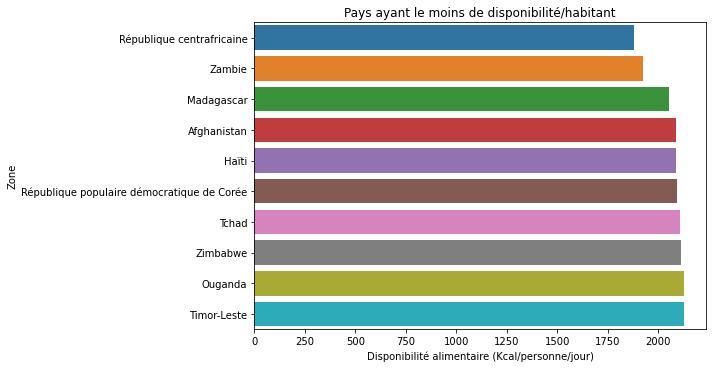

In [30]:
#On affiche les 10 pays qui ont le moins de disponibilité alimentaire/habitant sur un graphique
moins_dispo = top_dispo.sort_values(by = 'Disponibilité alimentaire (Kcal/personne/jour)', ascending = True)[:10]
plt.figure(figsize = (10, 5))
sns.barplot(data=moins_dispo, x="Disponibilité alimentaire (Kcal/personne/jour)", y=moins_dispo.Zone)
plt.tight_layout()
plt.title("Pays ayant le moins de disponibilité/habitant")
plt.show()

In [31]:
moins_dispo.head(10)

,Zone,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
128,République centrafricaine,1.0,27.0,1879.0,453.73,59.41,46.04,2582.0,0.0,76.0,2092.0,122.0,2503.0,63.0,278.0,3.0
166,Zambie,408.0,69.0,1924.0,350.12,42.05,55.22,10041.0,675.0,380.0,5088.0,242.0,10526.0,76.0,4178.0,-182.0
91,Madagascar,842.0,2522.0,2056.0,425.07,24.49,46.69,15216.0,236.0,924.0,9741.0,966.0,14160.0,375.0,844.0,375.0
0,Afghanistan,768.0,415.0,2087.0,351.41,33.50,58.26,13515.0,278.0,2988.0,10735.0,1135.0,11171.0,395.0,63.0,-368.0
65,Haïti,481.0,115.0,2089.0,397.78,48.92,47.70,6175.0,15.0,1204.0,4101.0,679.0,5072.0,36.0,762.0,-77.0
133,République populaire démocratique de Corée,816.0,695.0,2093.0,458.93,36.41,54.99,14876.0,83.0,993.0,11425.0,1066.0,13883.0,194.0,678.0,84.0
151,Tchad,104.0,2.0,2109.0,319.45,47.10,62.75,5304.0,0.0,290.0,4097.0,459.0,5153.0,101.0,542.0,-141.0
167,Zimbabwe,131.0,23.0,2113.0,336.59,57.18,48.32,9507.0,278.0,1342.0,4762.0,188.0,7914.0,76.0,4330.0,531.0
114,Ouganda,348.0,68.0,2126.0,535.58,46.57,52.64,26624.0,1218.0,1257.0,20121.0,991.0,26321.0,154.0,4982.0,269.0
154,Timor-Leste,9.0,2.0,2129.0,369.10,51.08,57.51,447.0,23.0,100.0,419.0,14.0,371.0,2.0,3.0,2.0


# Informations complémentaires 

## Le cas Haïti

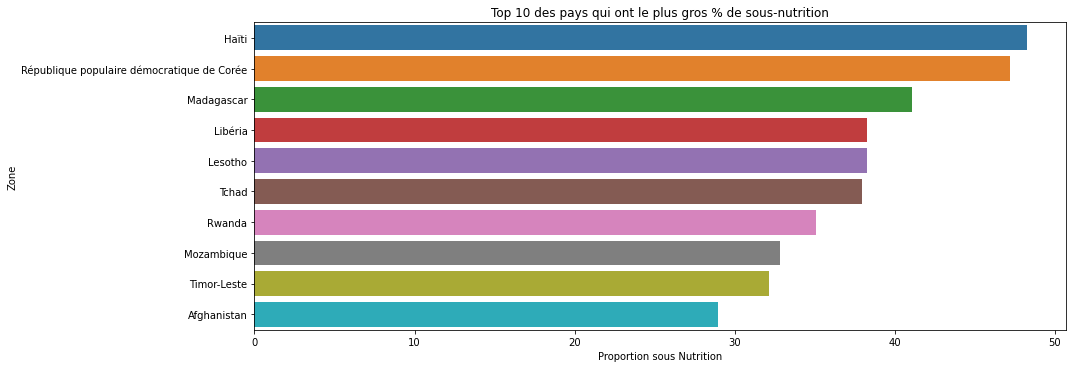

In [110]:
#On affiche un graphique avec les 10 pays qui ont le plus gros pourcentage de sous-nutrition
top_10_nutri = df2017.sort_values(by = 'Proportion sous Nutrition', ascending = False)[:10]
plt.figure(figsize = (15, 5))
sns.barplot(data=top_10_nutri, x="Proportion sous Nutrition", y="Zone")
plt.tight_layout()
plt.title("Top 10 des pays qui ont le plus gros % de sous-nutrition")
plt.show()

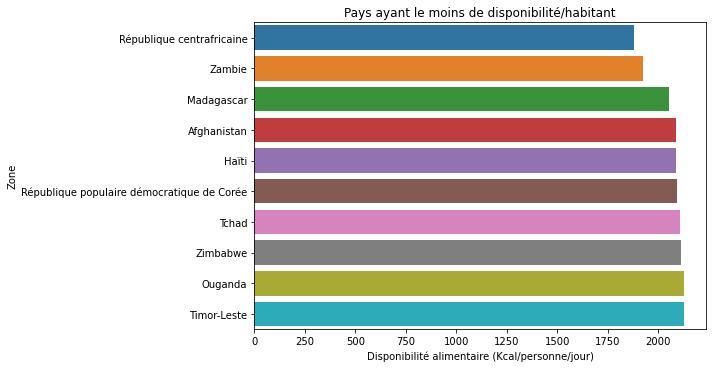

In [111]:
#On affiche les 10 pays qui ont le moins de disponibilité alimentaire/habitant sur un graphique
moins_dispo = top_dispo.sort_values(by = 'Disponibilité alimentaire (Kcal/personne/jour)', ascending = True)[:10]
plt.figure(figsize = (10, 5))
sns.barplot(data=moins_dispo, x="Disponibilité alimentaire (Kcal/personne/jour)", y=moins_dispo.Zone)
plt.tight_layout()
plt.title("Pays ayant le moins de disponibilité/habitant")
plt.show()

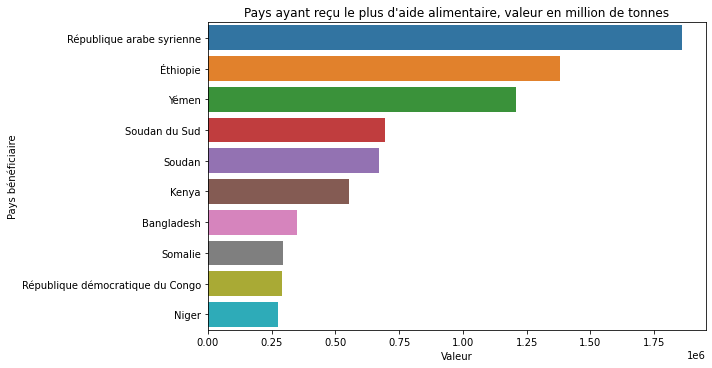

In [112]:
#On affiche un graphique avec les 10 pays qui ont reçu le plus d'aide alimentaire depuis 2013
top_10_aide = df_aide_recu.sort_values(by = 'Valeur', ascending = False)[:10]
plt.figure(figsize = (10, 5))
sns.barplot(data=top_10_aide, x="Valeur", y=top_10_aide.index)
plt.tight_layout()
plt.title("Pays ayant reçu le plus d'aide alimentaire, valeur en million de tonnes")
plt.show()

### Haïti est un pays en grande difficulté. Il est le pays avec la plus grosse part de sous-nutrition, tout en faisant partie des pays ayant la plus faible disponibilité par habitant et enfin il n'est pas dans le top des pays ayant reçu le plus d'aide alimentaire 